In [66]:
import pandas as pd

In [67]:
ufo_df = pd.read_csv(r'C:\Users\opiej\ufo-analysis-capstone\ufo-analysis-capstone\data\cleaned_drone_data.csv')
drone_df = pd.read_csv(r'C:\Users\opiej\ufo-analysis-capstone\ufo-analysis-capstone\data\cleaned_drone_data.csv')

In [68]:
ufo_df.columns = ufo_df.columns.str.strip().str.lower()
drone_df.columns = drone_df.columns.str.strip().str.lower()

In [69]:
merged_df = pd.merge(
    ufo_df,
    drone_df,
    on=['city', 'state', 'year', 'month'],
    how='inner' 
)


In [70]:
print(merged_df.head())
print(f"Merged rows: {len(merged_df)}")

             city     state      date_x  day of sighting_x  \
0  PATUXENT RIVER  MARYLAND  2022-07-01                NaN   
1     LITTLE ROCK  ARKANSAS  2022-07-01                NaN   
2     LITTLE ROCK  ARKANSAS  2022-07-01                NaN   
3     LITTLE ROCK  ARKANSAS  2022-07-01                NaN   
4           TAMPA   FLORIDA  2022-07-01                NaN   

                                           summary_x  datetime_x  year  month  \
0  PRELIM INFO FROM FAA OPS: PATUXENT RIVER, MD/U...  2022-07-01  2022      7   
1  PRELIM INFO FROM FAA OPS: LITTLE ROCK, AR/UAS ...  2022-07-01  2022      7   
2  PRELIM INFO FROM FAA OPS: LITTLE ROCK, AR/UAS ...  2022-07-01  2022      7   
3  PRELIM INFO FROM FAA OPS: LITTLE ROCK, AR/UAS ...  2022-07-01  2022      7   
4  PRELIM INFO FROM FAA OPS: TAMPA, FL/UAS SIGHTI...  2022-07-01  2022      7   

       date_y  day of sighting_y  \
0  2022-07-01                NaN   
1  2022-07-01                NaN   
2  2022-07-04                NaN

In [71]:
merged_df.to_csv("merged_ufo_drone_data.csv", index=False)


Plotting...

In [72]:
import pandas as pd

merged_df = pd.read_csv("merged_ufo_drone_data.csv")


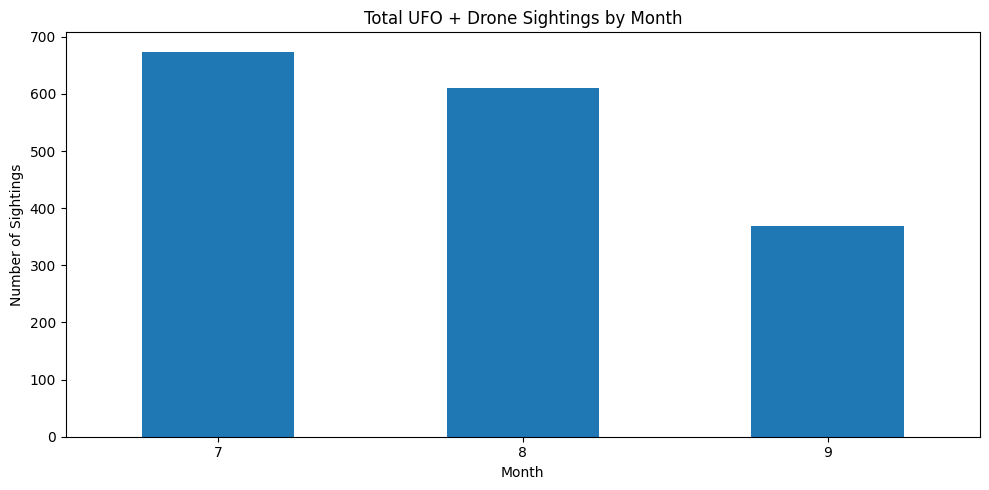

In [73]:
import matplotlib.pyplot as plt

monthly_counts = merged_df.groupby('month')[['city']].count()
monthly_counts = monthly_counts.rename(columns={'city': 'sightings'})

monthly_counts.plot(kind='bar', figsize=(10, 5), legend=False)

plt.title('Total UFO + Drone Sightings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


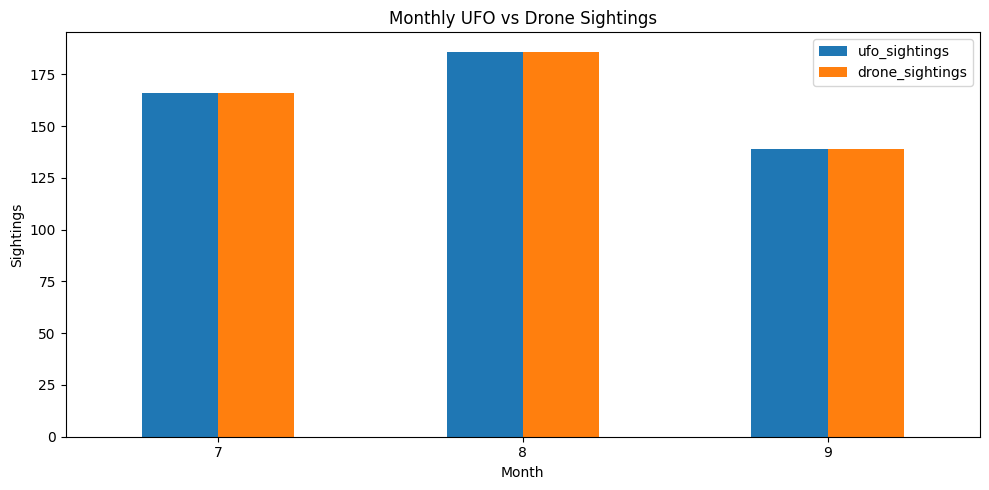

In [74]:

ufo_monthly = ufo_df.groupby('month')['city'].count().rename('ufo_sightings')

drone_monthly = drone_df.groupby('month')['city'].count().rename('drone_sightings')

comparison = pd.concat([ufo_monthly, drone_monthly], axis=1)

comparison.plot(kind='bar', figsize=(10, 5))
plt.title('Monthly UFO vs Drone Sightings')
plt.xlabel('Month')
plt.ylabel('Sightings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


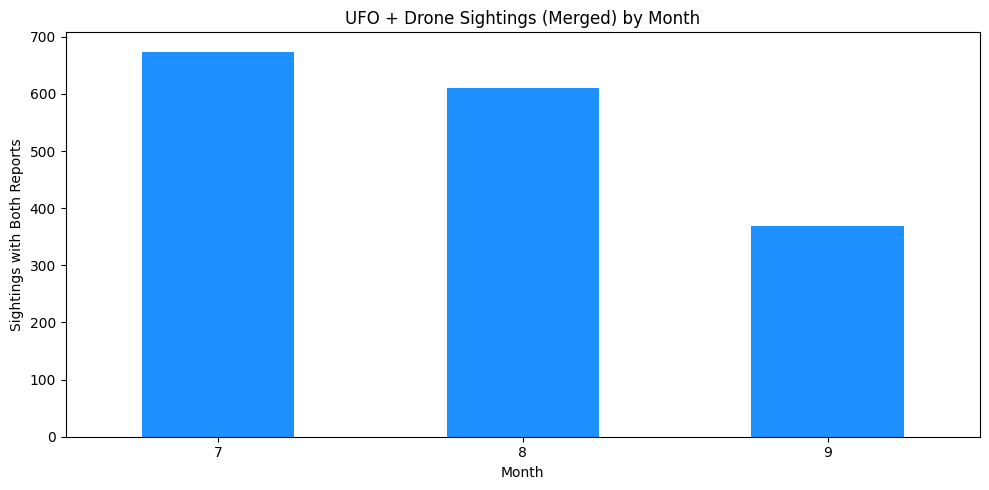

In [ ]:
import matplotlib.pyplot as plt

merged_counts = merged_df.groupby('month')['city'].count().rename('merged_sightings')
merged_counts = merged_counts.sort_index()

merged_counts.plot(kind='bar', figsize=(10, 5), color='dodgerblue')

plt.title('UFO + Drone Sightings (Merged) by Month')
plt.xlabel('Month')
plt.ylabel('Sightings with Both Reports')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
